<a href="https://colab.research.google.com/github/subham129/Deep-learning/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:TPU_SYSTEM:0', device_type='TPU_SYSTEM'),
 PhysicalDevice(name='/physical_device:TPU:0', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:1', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:2', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:3', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:4', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:5', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:6', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:7', device_type='TPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
x_train.shape


(50000, 32, 32, 3)

In [7]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

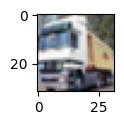

In [8]:
plot_sample(1)

In [9]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [10]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8109 - accuracy: 0.3537
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6224 - accuracy: 0.4273
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5422 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4823 - accuracy: 0.4790
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4310 - accuracy: 0.4959
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3874 - accuracy: 0.5139
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3505 - accuracy: 0.5225
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3133 - accuracy: 0.5381
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2834 - accuracy: 0.5499
Epoch 10/10
1563/1563 [==============================] - 29s 19m

In [13]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 1.3964 - accuracy: 0.5034


[1.3963998556137085, 0.5034000277519226]

In [14]:
model.predict(x_test_scaled)

313/313 [==============================] - 2s 6ms/step


array([[0.28498566, 0.2788587 , 0.8610553 , ..., 0.03871264, 0.31722215,
        0.05838525],
       [0.7020933 , 0.9626229 , 0.27834773, ..., 0.12839848, 0.9356541 ,
        0.99033475],
       [0.9639367 , 0.8407461 , 0.32881364, ..., 0.41873178, 0.8884092 ,
        0.89207506],
       ...,
       [0.08792259, 0.02667193, 0.91851854, ..., 0.42167827, 0.31266585,
        0.09677608],
       [0.4275754 , 0.2122808 , 0.9071533 , ..., 0.45997924, 0.03312828,
        0.11059431],
       [0.44551128, 0.11606316, 0.7442671 , ..., 0.90054655, 0.1326883 ,
        0.2042214 ]], dtype=float32)